In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [3]:
file_path = "anime.csv"   
anime_df = pd.read_csv(file_path)


anime_df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.info()


print("Dataset shape:", anime_df.shape)


anime_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
Dataset shape: (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [5]:

anime_df.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:

anime_df['genre'].fillna('Unknown', inplace=True)


anime_df['type'].fillna('Unknown', inplace=True)


anime_df['rating'].fillna(anime_df['rating'].mean(), inplace=True)


In [9]:
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')

In [10]:

anime_df.isnull().sum()


anime_df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [11]:
features = anime_df[['genre', 'type', 'rating', 'episodes', 'members']]
features.head()

,genre,type,rating,episodes,members
0,"Drama, Romance, School, Supernatural",Movie,9.37,1.0,200630
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,64.0,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,51.0,114262
3,"Sci-Fi, Thriller",TV,9.17,24.0,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,51.0,151266


In [13]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
type_encoded = ohe.fit_transform(features[['type']])


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

# Split genres by comma and apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(features['genre'].str.split(', '))





genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
type_df = pd.DataFrame(type_encoded, columns=ohe.get_feature_names_out(['type']))

# Combine with numerical features
num_features = features[['rating', 'episodes', 'members']].reset_index(drop=True)

final_features = pd.concat([genre_df, type_df, num_features], axis=1)
final_features.head()


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,rating,episodes,members
0,0,0,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.37,1.0,200630
1,1,1,0,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.26,64.0,793665
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.25,51.0,114262
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.17,24.0,673572
4,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.16,51.0,151266


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(num_features)


num_scaled_df = pd.DataFrame(num_scaled, columns=num_features.columns)


final_features = pd.concat([genre_df, type_df, num_scaled_df], axis=1)
final_features.head()


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,rating,episodes,members
0,0,0,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.924370,0.000000,0.197872
1,1,1,0,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.911164,0.034673,0.782770
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.909964,0.027518,0.112689
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.900360,0.012658,0.664325
4,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.899160,0.027518,0.149186


In [20]:

final_features = final_features.fillna(0)


from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(final_features, final_features)
print("Cosine similarity matrix shape:", cosine_sim.shape)


Cosine similarity matrix shape: (12294, 12294)


In [21]:
# Map anime_id to index for fast lookup
anime_indices = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

def recommend_anime(title, top_n=5, threshold=0.5):
    
    if title not in anime_indices:
        return f"Anime '{title}' not found in dataset."
    
    
    idx = anime_indices[title]
    
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [(i, score) for i, score in sim_scores if i != idx and score >= threshold]
    
    # Select top_n
    sim_scores = sim_scores[:top_n]
    
    # Retrieve anime names & scores
    recommendations = pd.DataFrame({
        "Anime": anime_df['name'].iloc[[i for i, _ in sim_scores]].values,
        "Similarity Score": [score for _, score in sim_scores]
    })
    
    return recommendations


In [22]:

recommend_anime("Naruto", top_n=10, threshold=0.4)


,Anime,Similarity Score
0,Naruto: Shippuuden,0.997434
1,Katekyo Hitman Reborn!,0.911988
2,Dragon Ball Z,0.872958
3,Bleach,0.856414
4,Dragon Ball Kai,0.855801
5,Dragon Ball Super,0.853189
6,Medaka Box,0.852548
7,Tenjou Tenge,0.851757
8,Medaka Box Abnormal,0.850534
9,Dragon Ball Kai (2014),0.849937


In [23]:

recommend_anime("Death Note", top_n=7, threshold=0.5)


,Anime,Similarity Score
0,Higurashi no Naku Koro ni Kai,0.889515
1,Mousou Dairinin,0.884710
2,Higurashi no Naku Koro ni,0.834382
3,Death Note Rewrite,0.803366
4,Mirai Nikki (TV),0.801117
5,Jigoku Shoujo Mitsuganae,0.790425
6,Yakushiji Ryouko no Kaiki Jikenbo,0.781085


In [24]:

recommend_anime("One Piece", top_n=10, threshold=0.7)

# Lower threshold (more lenient, more recommendations)
recommend_anime("One Piece", top_n=10, threshold=0.3)


,Anime,Similarity Score
0,Digimon Frontier,0.930227
1,Dragon Ball Z,0.884855
2,Dragon Ball Kai,0.877179
3,Dragon Ball Super,0.875697
4,Dragon Ball Kai (2014),0.873820
5,One Piece: Episode of Nami - Koukaishi no Nami...,0.873420
6,One Piece: Episode of Merry - Mou Hitori no Na...,0.873053
7,Shingeki no Kyojin,0.872468
8,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,0.871717
9,Shingeki no Kyojin Season 2,0.870370


In [25]:
from sklearn.model_selection import train_test_split

anime_rated = anime_df.dropna(subset=['rating'])

# Split into train/test
train_df, test_df = train_test_split(anime_rated, test_size=0.2, random_state=42)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (9835, 7)
Test size: (2459, 7)


In [26]:
def precision_recall_f1(recommended, relevant):
    recommended_set = set(recommended)
    relevant_set = set(relevant)
    
    true_positives = len(recommended_set & relevant_set)
    precision = true_positives / len(recommended_set) if recommended_set else 0
    recall = true_positives / len(relevant_set) if relevant_set else 0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
    
    return precision, recall, f1


In [28]:
def get_relevant_by_genre(anime_name, dataset):
    
    if anime_name not in dataset['name'].values:
        return []
    
    target_genres = dataset.loc[dataset['name'] == anime_name, 'genre'].values[0]
    if pd.isna(target_genres):
        return []
    
    target_genres = set(target_genres.split(', '))
    relevant = dataset[dataset['genre'].notna()].copy()
    
    relevant = relevant[relevant['genre'].apply(lambda g: len(set(g.split(', ')) & target_genres) > 0)]
    
    return relevant['name'].tolist()


In [29]:
precisions, recalls, f1s = [], [], []

sample_test = test_df.sample(100, random_state=42)

for _, row in sample_test.iterrows():
    anime_name = row['name']
    
    recs = recommend_anime(anime_name, top_n=10, threshold=0.0)
    if isinstance(recs, str):  # skip missing
        continue
    
    recommended = recs['Anime'].tolist()
    relevant = get_relevant_by_genre(anime_name, test_df)
    
    if not relevant:  # skip if no relevant items found
        continue
    
    p, r, f = precision_recall_f1(recommended, relevant)
    precisions.append(p)
    recalls.append(r)
    f1s.append(f)

print("Average Precision:", sum(precisions)/len(precisions))
print("Average Recall:", sum(recalls)/len(recalls))
print("Average F1-Score:", sum(f1s)/len(f1s))


Average Precision: 0.19
Average Recall: 0.00414972973950438
Average F1-Score: 0.007692485204016829


In [30]:
import matplotlib.pyplot as plt

def confusion_counts(recommended, relevant, all_items):
    
    rec_set = set(recommended)
    rel_set = set(relevant)
    
    tp = len(rec_set & rel_set)  # correctly recommended
    fp = len(rec_set - rel_set)  # recommended but not relevant
    fn = len(rel_set - rec_set)  # relevant but not recommended
    tn = len(all_items) - (tp + fp + fn)  # everything else
    
    return tp, fp, fn, tn


In [31]:
tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

all_items = set(test_df['name'].tolist())
sample_test = test_df.sample(100, random_state=42)

for _, row in sample_test.iterrows():
    anime_name = row['name']
    recs = recommend_anime(anime_name, top_n=10, threshold=0.0)
    if isinstance(recs, str):
        continue
    
    recommended = recs['Anime'].tolist()
    relevant = get_relevant_by_genre(anime_name, test_df)
    
    if not relevant:
        continue
    
    tp, fp, fn, tn = confusion_counts(recommended, relevant, all_items)
    tp_total += tp
    fp_total += fp
    fn_total += fn
    tn_total += tn

print("TP:", tp_total, "FP:", fp_total, "FN:", fn_total, "TN:", tn_total)


TP: 190 FP: 810 FN: 86477 TN: 158423


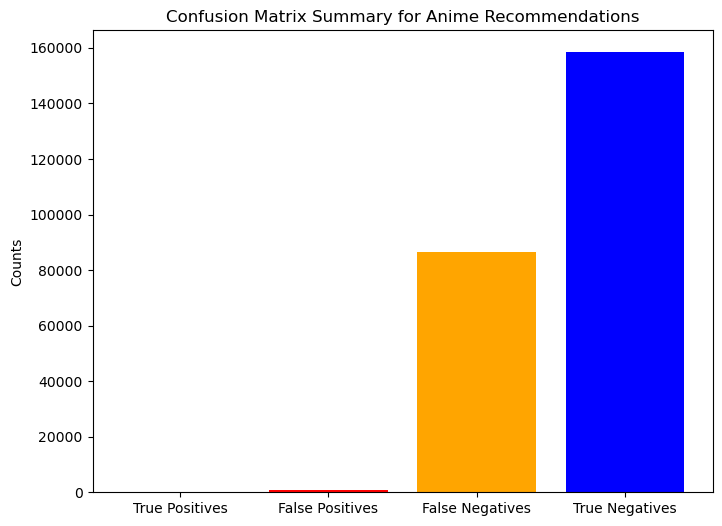

In [32]:

labels = ["True Positives", "False Positives", "False Negatives", "True Negatives"]
values = [tp_total, fp_total, fn_total, tn_total]

plt.figure(figsize=(8,6))
plt.bar(labels, values, color=["green", "red", "orange", "blue"])
plt.title("Confusion Matrix Summary for Anime Recommendations")
plt.ylabel("Counts")
plt.show()


Collaborative filtering is a recommendation technique that predicts a user’s preferences by leveraging the behavior and feedback of many users. Instead of relying on item features, it analyzes patterns in the user–item interaction matrix. The system identifies similarities either between users or between items to recommend products, movies, or content. For example, if two users have shown similar tastes, the system recommends items liked by one to the other, or if two items are often liked together, the system suggests those items to users who liked one of them. This approach is domain-independent and can capture complex behavior patterns but faces challenges such as data sparsity, cold start for new users or items, and scalability in large systems.

Within collaborative filtering, there are two main types: user-based and item-based. User-based collaborative filtering finds users with similar preferences to the target user and recommends items they have liked. This approach is intuitive but less scalable and unstable since user tastes change over time. On the other hand, item-based collaborative filtering identifies items similar to those the user has already interacted with and recommends them. It is generally more stable and scalable, as item similarities remain relatively constant, making it widely adopted in large-scale systems like Amazon. The key difference lies in the focus—user-based methods look for similar users, while item-based methods look for similar items.